<a href="https://colab.research.google.com/github/dingyida/reinforce-learning/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [1]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -595
Episode 2: total reward = -793
Episode 3: total reward = -694
Episode 4: total reward = -991
Episode 5: total reward = -1288


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [7]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))



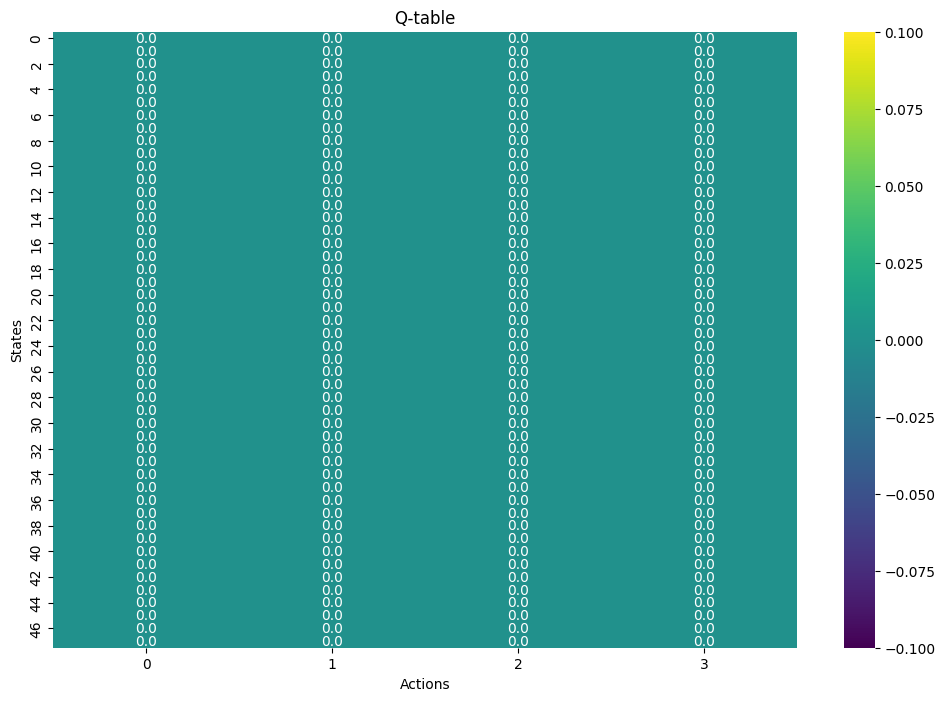

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

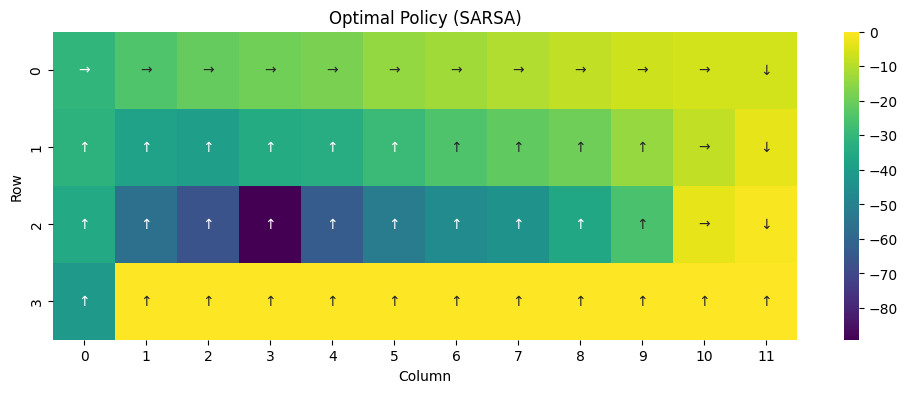

In [11]:

# ---- ADDED: small helper for ε-greedy ----
def epsilon_greedy(q_row, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

# ---- ADDED: tiny SARSA training loop (on-policy TD control) ----
epsilon_start, epsilon_end = 1.0, 0.05
for ep in range(n_episodes):
    # linear ε decay
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * (1 - ep / max(1, n_episodes - 1))
    s, _ = env.reset()
    a = epsilon_greedy(Q[s], epsilon)

    for _ in range(max_steps):
        s_next, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated

        # choose next action on-policy (SARSA)
        a_next = epsilon_greedy(Q[s_next], epsilon) if not done else 0

        # SARSA update (target = r + γ Q[s',a'])
        td_target = r + (0 if done else discount_factor * Q[s_next, a_next])
        Q[s, a] += learning_rate * (td_target - Q[s, a])

        s, a = s_next, a_next
        if done:
            break







def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

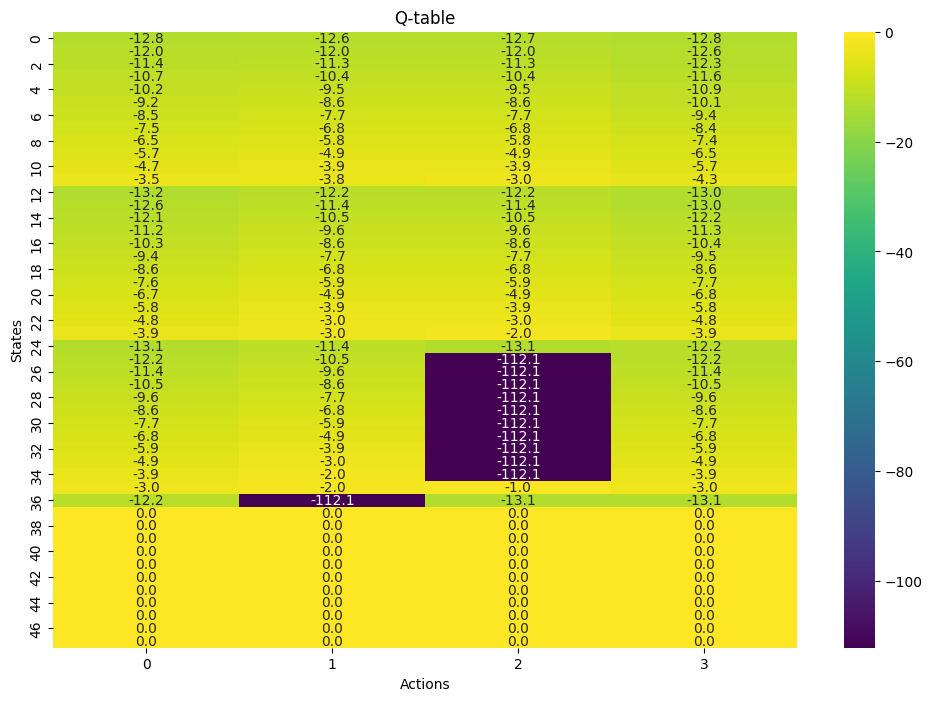

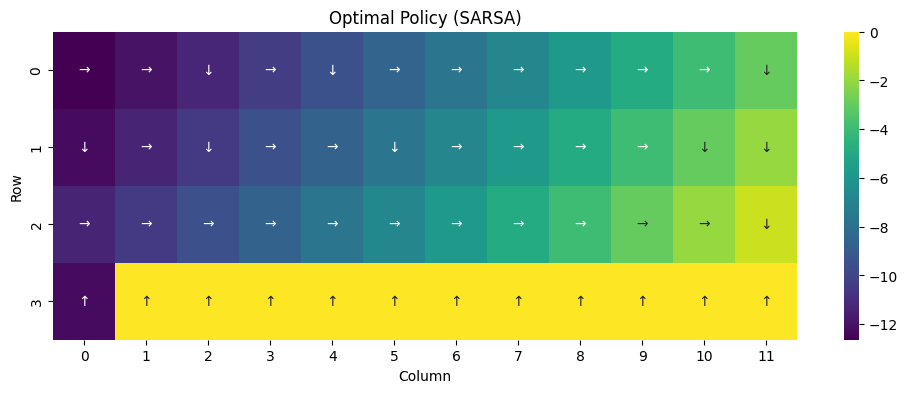

In [12]:
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100        # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# ---- ADDED: small helper for ε-greedy ----
def epsilon_greedy(q_row, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

# ---- ADDED: tiny SARSA training loop (on-policy TD control) ----
epsilon_start, epsilon_end = 1.0, 0.05
for ep in range(n_episodes):
    # linear ε decay
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * (1 - ep / max(1, n_episodes - 1))
    s, _ = env.reset()
    a = epsilon_greedy(Q[s], epsilon)

    for _ in range(max_steps):
        s_next, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated

        # choose next action on-policy (SARSA)
        a_next = epsilon_greedy(Q[s_next], epsilon) if not done else 0



        # Q-learning update (target = r + γ max_a Q[s',a])
        td_target = r + (0 if done else discount_factor * np.max(Q[s_next]))

        Q[s, a] += learning_rate * (td_target - Q[s, a])

        s, a = s_next, a_next
        if done:
            break

# ----------------- plotting -----------------
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.title("Q-table")
    plt.show()

plot_Q(Q)

def plot_policy(Q, title="SARSA"):
    # Reshape Q table to a 4x12 grid
    Q_grid = Q.reshape((4, 12, n_actions))

    # Get the optimal action for each state and its corresponding Q-value
    optimal_action = np.argmax(Q_grid, axis=2)
    optimal_policy_Q = np.max(Q_grid, axis=2)

    # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
    action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
    optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)

    plt.figure(figsize=(12, 4))
    sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True)
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title(f"Optimal Policy ({title})")
    plt.show()

plot_policy(Q, title="SARSA")


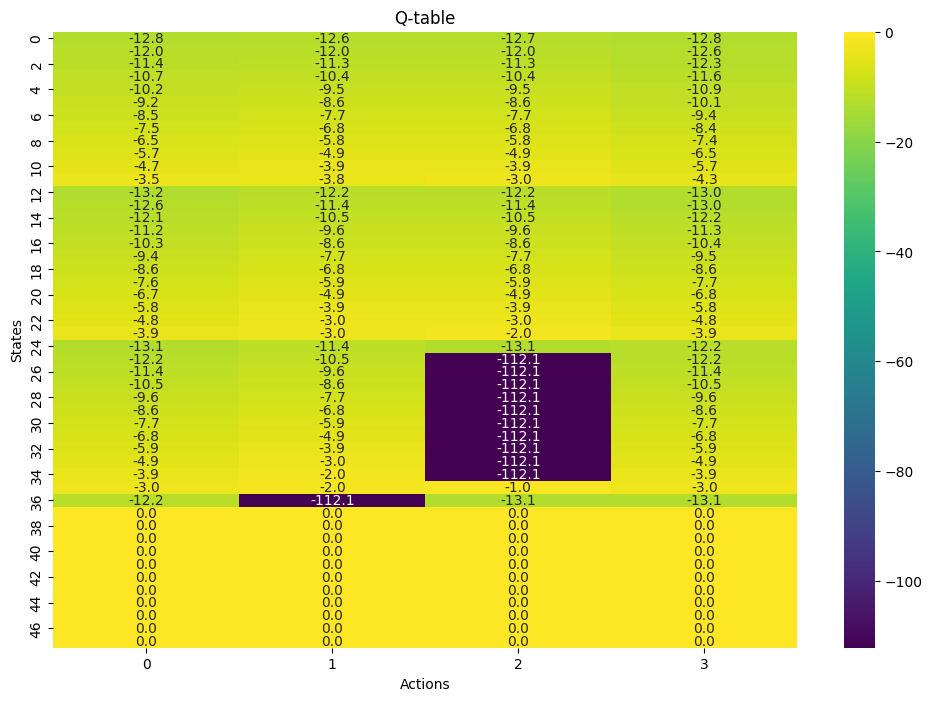

In [13]:
plot_Q(Q)

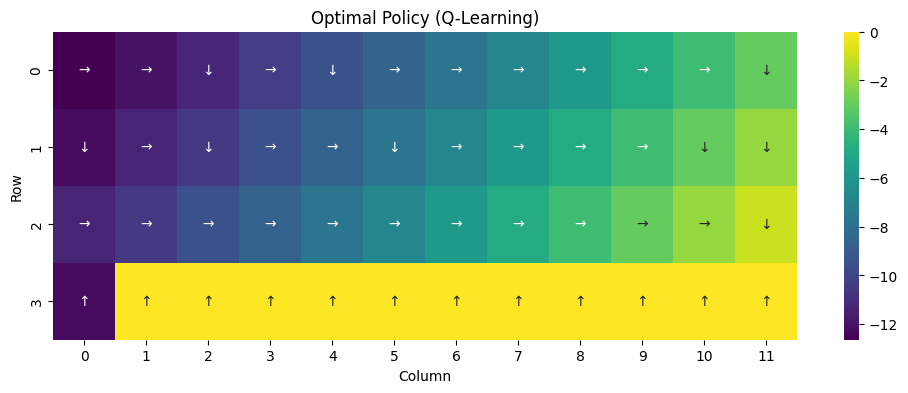

In [14]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


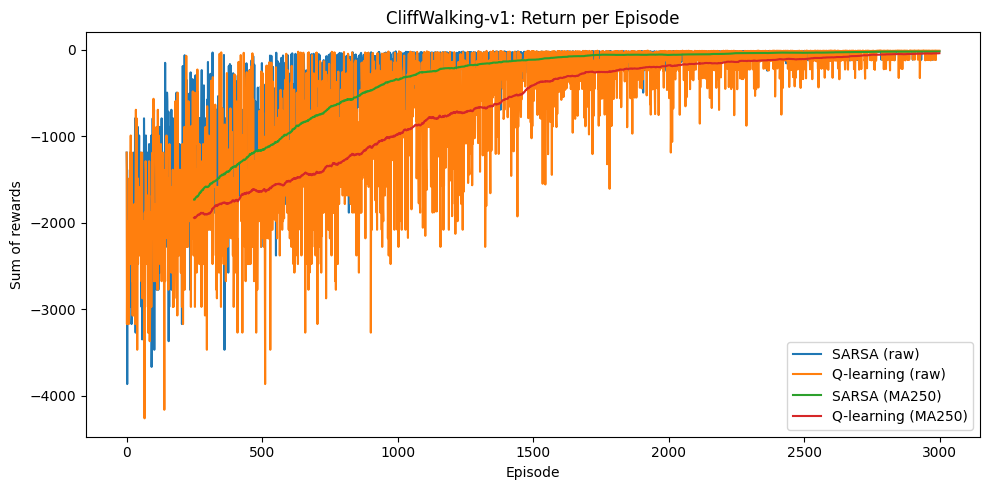

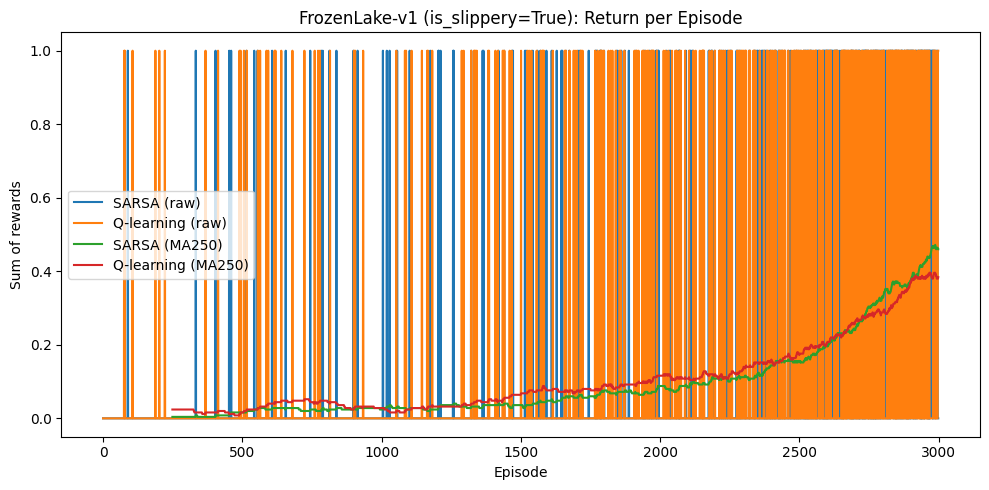

=== Mean Return over Last 200 Episodes ===
CliffWalking - SARSA     : -22.95
CliffWalking - Q-learning: -40.175
FrozenLake  - SARSA      : 0.49
FrozenLake  - Q-learning : 0.405


In [17]:
# pip install gymnasium matplotlib
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def epsilon_greedy(q_row, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_row))
    return int(np.argmax(q_row))

def run_control(env_name, algo="sarsa", n_episodes=1500, max_steps=200,
                alpha=0.1, gamma=0.99, eps_start=1.0, eps_end=0.05,
                is_slippery=None):
    # Build env, adding is_slippery only where valid (FrozenLake)
    if env_name == "FrozenLake-v1" and is_slippery is not None:
        env = gym.make(env_name, is_slippery=is_slippery)
    else:
        env = gym.make(env_name)

    n_actions = env.action_space.n
    n_states  = env.observation_space.n
    Q = np.zeros((n_states, n_actions), dtype=np.float64)

    returns = []

    for ep in range(n_episodes):
        # linear epsilon decay
        epsilon = eps_end + (eps_start - eps_end) * (1 - ep / max(1, n_episodes - 1))
        s, _ = env.reset()
        a = epsilon_greedy(Q[s], epsilon)  # SARSA needs next action; cheap for Q too

        ep_return = 0.0
        for _ in range(max_steps):
            s_next, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            ep_return += r

            if algo == "sarsa":
                if not done:
                    a_next = epsilon_greedy(Q[s_next], epsilon)
                    td_target = r + gamma * Q[s_next, a_next]
                else:
                    td_target = r
            elif algo == "q_learning":
                if not done:
                    td_target = r + gamma * np.max(Q[s_next])
                else:
                    td_target = r
            else:
                raise ValueError("Unknown algo")

            Q[s, a] += alpha * (td_target - Q[s, a])

            if done:
                break

            s = s_next
            a = a_next if algo == "sarsa" else epsilon_greedy(Q[s_next], epsilon)

        returns.append(ep_return)

    env.close()
    return np.array(returns)

def moving_average(x, k=25):
    if k <= 1: return x
    y = np.convolve(x, np.ones(k)/k, mode="valid")
    pad = np.full(k-1, np.nan)
    return np.concatenate([pad, y])

# --------- EXPERIMENT 1: CliffWalking (no is_slippery) ----------
N, MAX_STEPS = 3000, 200
ALPHA, GAMMA = 0.1, 0.99
EPS0, EPSF = 1.0, 0.05
K = 250

cliff_sarsa = run_control("CliffWalking-v1", "sarsa", N, MAX_STEPS, ALPHA, GAMMA, EPS0, EPSF)
cliff_q     = run_control("CliffWalking-v1", "q_learning", N, MAX_STEPS, ALPHA, GAMMA, EPS0, EPSF)

plt.figure(figsize=(10,5))
plt.plot(cliff_sarsa, label="SARSA (raw)")
plt.plot(cliff_q,     label="Q-learning (raw)")
plt.plot(moving_average(cliff_sarsa, K), label=f"SARSA (MA{K})")
plt.plot(moving_average(cliff_q, K),     label=f"Q-learning (MA{K})")
plt.title("CliffWalking-v1: Return per Episode")
plt.xlabel("Episode"); plt.ylabel("Sum of rewards"); plt.legend(); plt.tight_layout()
plt.show()

# --------- EXPERIMENT 2: FrozenLake (is_slippery=True) ----------
lake_sarsa = run_control("FrozenLake-v1", "sarsa", N, MAX_STEPS, ALPHA, GAMMA, EPS0, EPSF, is_slippery=True)
lake_q     = run_control("FrozenLake-v1", "q_learning", N, MAX_STEPS, ALPHA, GAMMA, EPS0, EPSF, is_slippery=True)

plt.figure(figsize=(10,5))
plt.plot(lake_sarsa, label="SARSA (raw)")
plt.plot(lake_q,     label="Q-learning (raw)")
plt.plot(moving_average(lake_sarsa, K), label=f"SARSA (MA{K})")
plt.plot(moving_average(lake_q, K),     label=f"Q-learning (MA{K})")
plt.title("FrozenLake-v1 (is_slippery=True): Return per Episode")
plt.xlabel("Episode"); plt.ylabel("Sum of rewards"); plt.legend(); plt.tight_layout()
plt.show()

# quick numeric comparison over the last 200 episodes
def tail_mean(x, tail=200):
    x = np.array(x); return float(np.nanmean(x[-tail:]))

print("=== Mean Return over Last 200 Episodes ===")
print("CliffWalking - SARSA     :", tail_mean(cliff_sarsa))
print("CliffWalking - Q-learning:", tail_mean(cliff_q))
print("FrozenLake  - SARSA      :", tail_mean(lake_sarsa))
print("FrozenLake  - Q-learning :", tail_mean(lake_q))


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [18]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

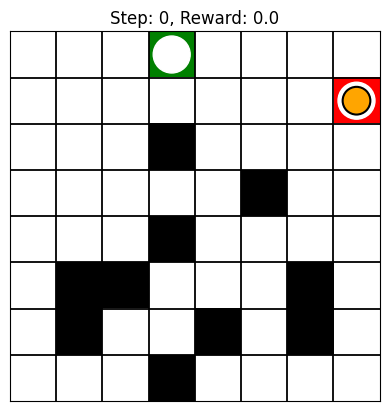

KeyboardInterrupt: 

In [19]:
import gymnasium as gym
import gym_simplegrid
import numpy as np

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has a number from 0 to 63.
options = {
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)

# --------- NEW: MC config & storage ----------
GAMMA = 0.99
N_EPISODES = 100        # increase for smoother estimates
N_STATES = 64             # SimpleGrid-8x8 has 64 states
returns_sum = np.zeros(N_STATES, dtype=np.float64)
returns_cnt = np.zeros(N_STATES, dtype=np.int64)

# --------- Generate episodes + First-Visit MC ----------
for ep in range(N_EPISODES):
    # collect one episode under random policy
    states, rewards = [], []
    obs, info = env.reset(options=options)
    done = False

    # your original loop form, just until episode ends
    for t in range(100):
        if done:
            break
        action = env.action_space.sample()   # Random action
        next_obs, reward, done, _, info = env.step(action)

        states.append(obs)
        rewards.append(reward)
        obs = next_obs

    # compute returns backwards
    G = 0.0
    returns = np.zeros(len(states), dtype=np.float64)
    for t in reversed(range(len(states))):
        G = rewards[t] + GAMMA * G
        returns[t] = G

    # first-visit updates
    seen = set()
    for t, s in enumerate(states):
        if s in seen:
            continue
        seen.add(s)
        returns_sum[s] += returns[t]
        returns_cnt[s] += 1

# --------- Compute V(s) and print as grid ----------
V = np.zeros(N_STATES, dtype=np.float64)
mask = returns_cnt > 0
V[mask] = returns_sum[mask] / returns_cnt[mask]

grid_size = 8
V_grid = V.reshape(grid_size, grid_size)
np.set_printoptions(precision=3, suppress=True)
print("Estimated V(s) under random policy (first-visit MC):")
print(V_grid)

# env.close()
